img: <class 'numpy.ndarray'> (321, 541, 3) uint8


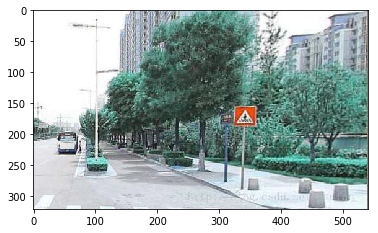

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#加载原图
img=cv2.imread('test2.jpg')
print('img:',type(img),img.shape,img.dtype)
plt.imshow(img)
plt.imsave('img.jpg',img)

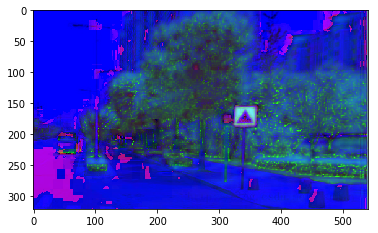

In [12]:
hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)
plt.imsave('hsv.jpg',hsv)

mask <class 'numpy.ndarray'> (321, 541)


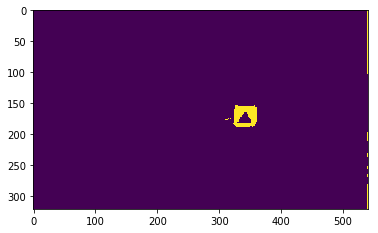

In [13]:
#提取蓝色区域
blue_lower=np.array([100,50,50])
blue_upper=np.array([124,255,255])
mask=cv2.inRange(hsv,blue_lower,blue_upper)
print('mask',type(mask),mask.shape)
plt.imshow(mask)
plt.imsave('mask.jpg',mask)

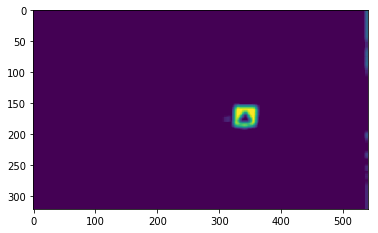

In [14]:
#模糊
blurred=cv2.blur(mask,(9,9))
plt.imshow(blurred)
plt.imsave('blurred.jpg',blurred)

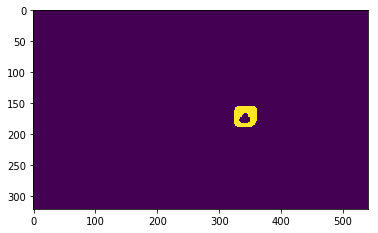

In [15]:
#二值化
ret,binary=cv2.threshold(blurred,127,255,cv2.THRESH_BINARY)
plt.imshow(binary)
plt.imsave('binary.jpg',binary)

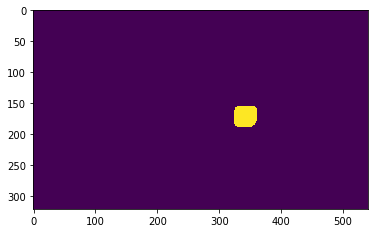

In [16]:
#使区域闭合无空隙
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed)
plt.imsave('closed.jpg',closed)

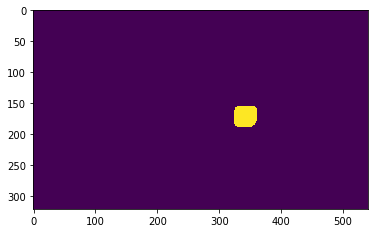

In [17]:
#腐蚀和膨胀
'''
腐蚀操作将会腐蚀图像中白色像素，以此来消除小斑点，
而膨胀操作将使剩余的白色像素扩张并重新增长回去。
'''
erode=cv2.erode(closed,None,iterations=4)
plt.imshow(erode)
dilate=cv2.dilate(erode,None,iterations=4)
plt.imshow(dilate)
plt.imsave('dilate.jpg',dilate)

轮廓个数： 1
[array([[325, 187],
       [325, 155],
       [361, 155],
       [361, 187]], dtype=int64)]
h1 187
h2 155
l1 361
l2 325


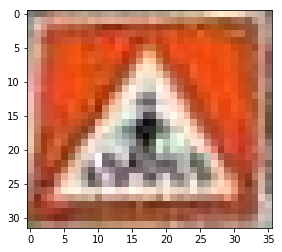

In [18]:
# 查找轮廓
image,contours, hierarchy=cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print('轮廓个数：',len(contours))
i=0
res=img.copy()
for con in contours:
    #轮廓转换为矩形
    rect=cv2.minAreaRect(con)
    #矩形转换为box
    box=np.int0(cv2.boxPoints(rect))
    #在原图画出目标区域
    cv2.drawContours(res,[box],-1,(0,0,255),2)
    print([box])
    #计算矩形的行列
    h1=max([box][0][0][1],[box][0][1][1],[box][0][2][1],[box][0][3][1])
    h2=min([box][0][0][1],[box][0][1][1],[box][0][2][1],[box][0][3][1])
    l1=max([box][0][0][0],[box][0][1][0],[box][0][2][0],[box][0][3][0])
    l2=min([box][0][0][0],[box][0][1][0],[box][0][2][0],[box][0][3][0])
    print('h1',h1)
    print('h2',h2)
    print('l1',l1)
    print('l2',l2)
    #加上防错处理，确保裁剪区域无异常
    if h1-h2>0 and l1-l2>0:
        #裁剪矩形区域
        temp=img[h2:h1,l2:l1]
        i=i+1
        #显示裁剪后的标志
        plt.imshow(temp)
        plt.imsave('temp.jpg',temp)

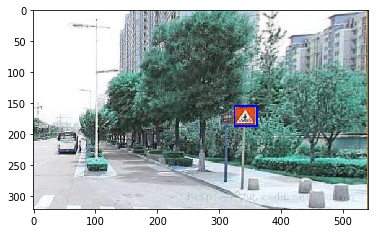

In [10]:
#显示画了标志的原图       
plt.imshow(res)
plt.imsave('res.jpg',res)